In [36]:
import random
import numpy as np
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


train["Age"] = train["Age"].fillna(random.random()*100)
train["Cabin"] = train["Cabin"].fillna(0)
train.Embarked = train.Embarked.replace(['C','S','Q'], [0,1,2])
train.Sex = train.Sex.replace(['male', 'female'], [0,1])

train["Cabin"] = pd.to_numeric(train["Cabin"], errors = "coeres")
train["Cabin"] = train["Cabin"].fillna(1)

In [37]:
def kesson_table(df):
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/ len(df)
    kesson_table = pd.concat([null_val, percent], axis = 1)
    kesson_table_ren_columns = kesson_table.rename(
    columns = {0: '欠損数', 1: '%'})
    return kesson_table_ren_columns

In [38]:
train = train.dropna()

In [39]:
train_labels = train['Survived'].values
train_features = train
train_features.drop(['Survived', 'Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
train_features = train_features.values.astype(np.int64)

<bound method Container.summary of <keras.models.Sequential object at 0x0000014525600048>>
Train on 622 samples, validate on 267 samples
Epoch 1/300
622/622 [==============================] - 0s 655us/step - loss: 4.2931 - acc: 0.3859 - val_loss: 2.4855 - val_acc: 0.3371
Epoch 2/300
622/622 [==============================] - 0s 133us/step - loss: 2.7275 - acc: 0.4116 - val_loss: 1.1804 - val_acc: 0.5318
Epoch 3/300
622/622 [==============================] - 0s 160us/step - loss: 1.8944 - acc: 0.5338 - val_loss: 0.8228 - val_acc: 0.5805
Epoch 4/300
622/622 [==============================] - 0s 135us/step - loss: 1.6775 - acc: 0.5563 - val_loss: 0.7252 - val_acc: 0.6554
Epoch 5/300
622/622 [==============================] - 0s 151us/step - loss: 1.3778 - acc: 0.5949 - val_loss: 0.6586 - val_acc: 0.6966
Epoch 6/300
622/622 [==============================] - 0s 126us/step - loss: 1.2615 - acc: 0.6238 - val_loss: 0.6360 - val_acc: 0.7116
Epoch 7/300
622/622 [==============================] 

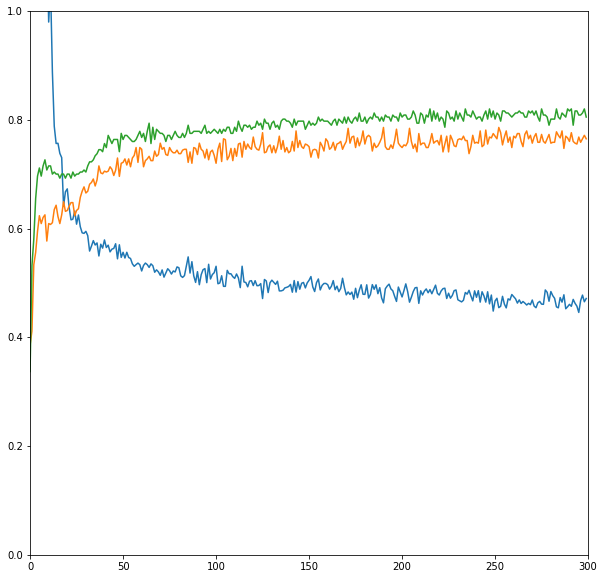

In [50]:
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


model = keras.Sequential([
    keras.layers.Dense(12, activation = "relu", input_dim = 7),
    keras.layers.Dense(8, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation = tf.nn.softmax),
    
])

model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = "sparse_categorical_crossentropy",
             metrics=["accuracy"])
print(model.summary)

epochs = 150
fit = model.fit(train_features, train_labels, epochs=epochs, validation_split=0.3)

plt.figure(figsize=(10,10))
plt.xlim(0,epochs)
plt.ylim(0,1)
plt.plot(fit.history['loss'], label='loss of training')
plt.plot(fit.history['acc'], label='acc of training')
plt.plot(fit.history['val_acc'], label='acc of evaluate')
